In [ ]:
#https://www.kaggle.com/kredy10/simple-lstm-for-text-classification/notebook

In [3]:
path= "/Users/KumarSanjeev/Desktop/Training Data/spam.csv"


In [5]:
import pandas as pd
data=pd.read_csv(path,encoding='latin-1')

In [6]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
data.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [9]:
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [15]:
X=data["v2"]

In [20]:
y=data["v1"]

In [22]:
#importing libraries


In [30]:
print("importing libraries.....")

importing libraries.....


In [67]:
print("importing libraries.....")


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding,SpatialDropout1D
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline


importing libraries.....


Text(0.5, 0, 'numbers')

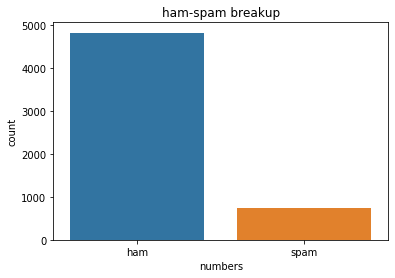

In [37]:
sns.countplot(y)
plt.title("ham-spam breakup")
plt.xlabel("numbers")

In [38]:
le= LabelEncoder()

In [44]:
y=le.fit_transform(y)
y

array([0, 0, 1, ..., 0, 0, 0])

In [43]:
y.reshape(-1,1)

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [75]:
# Train Test Split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15)

In [76]:
len(X_test),len(y_test)

(836, 836)

In [77]:
"""
Tokenize the data and convert the text to sequences.
Add padding to ensure that all the sequences have the same shape.
There are many ways of taking the max_len and here an arbitrary length of 150 is chosen.
"""


'\nTokenize the data and convert the text to sequences.\nAdd padding to ensure that all the sequences have the same shape.\nThere are many ways of taking the max_len and here an arbitrary length of 150 is chosen.\n'

In [78]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)

In [79]:
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [94]:
#print(sequences)

In [83]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [84]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_11 (Embedding)     (None, 150, 50)           50000     
_________________________________________________________________
lstm_7 (LSTM)                (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257       
__________

In [86]:
model.fit(sequences_matrix,y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Train on 3788 samples, validate on 948 samples
Epoch 1/10
3788/3788 [==============================] - 5s 1ms/step - loss: 0.3319 - acc: 0.8714 - val_loss: 0.1718 - val_acc: 0.9262
Epoch 2/10
3788/3788 [==============================] - 4s 1ms/step - loss: 0.0884 - acc: 0.9778 - val_loss: 0.0557 - val_acc: 0.9863
Epoch 3/10
3788/3788 [==============================] - 5s 1ms/step - loss: 0.0476 - acc: 0.9860 - val_loss: 0.0516 - val_acc: 0.9852
Epoch 4/10
3788/3788 [==============================] - 5s 1ms/step - loss: 0.0343 - acc: 0.9918 - val_loss: 0.0557 - val_acc: 0.9831


In [87]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [91]:
accr = model.evaluate(test_sequences_matrix,y_test)
accr

836/836 [==============================] - 1s 619us/step


[0.03714101260882227, 0.9868421052631579]

In [93]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.037
  Accuracy: 0.987
